In [1]:

import lightgbm as lgb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math 
import os, pandas as pd
from scipy import stats
# Add asset from file system
df_data_1 = pd.read_csv(os.environ['DSX_PROJECT_DIR']+'/datasets/creditcard-training set v2.csv')
df_data_1.head()



,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [ ]:
df_data_1['Seconds since reference time'].mean()/3600

In [2]:
#checking for null values
df_data_1.isnull().sum()
#feature 5 and feature 6 has null values. Needs fixing later.


Seconds since reference time        0
Amount                              0
Fraud? (1: Fraud, 0:  No Fraud)     0
Feature 1                           0
Feature 2                           0
Feature 3                           0
Feature 4                           0
Feature 5                          27
Feature 6                          59
Feature 7                           0
Feature 8                           0
Feature 9                           0
Feature 10                          0
Feature 11                          0
Feature 12                          0
Feature 13                          0
Feature 14                          0
Feature 15                          0
Feature 16                          0
Feature 17                          0
Feature 18                          0
Feature 19                          0
Feature 20                          0
Feature 21                          0
Feature 22                          0
Feature 23                          0
Feature 24  

In [3]:
# we'll try filling them with 0 for now.
df_data_1 = df_data_1.fillna(0)

In [4]:
df_data_1.describe()

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
count,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,...,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000
mean,79042.504749,90.825317,0.001830,0.049116,-0.005509,0.015160,-0.022870,-0.007267,0.009940,-0.005657,...,0.030540,-0.026843,0.003986,0.027511,0.032867,0.016712,-0.045001,0.076274,-0.001708,0.002219
std,39505.785991,250.504249,0.042742,0.933915,0.885633,0.874173,0.842786,0.819960,0.779024,0.761744,...,1.321420,1.228243,1.209610,8.652541,0.965725,1.019592,1.055865,1.033516,1.093933,1.123424
min,0.000000,0.000000,0.000000,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,...,-26.160506,-43.557242,-73.216718,-14.999725,-19.214325,-5.791881,-18.683715,-4.797473,-24.588262,-13.434066
25%,47694.000000,6.000000,0.000000,-0.543185,-0.478638,-0.457550,-0.514930,-0.478203,-0.202718,-0.225600,...,-0.731719,-0.568948,-0.195151,-7.466957,-0.386010,-0.651170,-0.453237,-0.682527,-0.522697,-0.662053
50%,73261.000000,23.400000,0.000000,0.120841,0.059919,-0.045765,-0.025810,-0.005872,-0.050963,-0.034863,...,-0.237643,0.009785,0.033492,0.044266,0.067860,-0.001631,0.118528,0.030157,-0.093071,-0.067951
75%,120396.000000,79.990000,0.000000,0.724566,0.528866,0.410328,0.476318,0.468257,0.144994,0.168401,...,0.432330,0.532569,0.332266,7.521777,0.509023,0.686509,0.611637,0.835856,0.456881,0.612866
max,145245.000000,19656.530000,1.000000,5.825654,8.289890,9.253526,5.041069,5.591971,39.420904,27.202839,...,22.529298,36.877368,20.007208,14.999989,10.526766,4.569009,7.848392,12.018913,23.745136,15.594995


In [12]:
#sns.heatmap(df_data_1.corr())
# from heat map we can see that there is no correlation whatsoever between features
df_corr = df_data_1.corr()
df_corr = pd.DataFrame(df_corr)

In [13]:
df_corr = df_corr.iloc[:,[0,1,2]]
df_corr_rank = df_corr.rank()
df_corr.rank()
# amount and seconds since reference time do not really affect fraud.
df_corr_rank = df_corr_rank.loc[df_corr_rank.iloc[:,2] <= 10] # get top 10 correlated features

In [14]:
df_corr

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)"
Seconds since reference time,1.000000,0.005782,-0.012719
Amount,0.005782,1.000000,0.005954
"Fraud? (1: Fraud, 0: No Fraud)",-0.012719,0.005954,1.000000
Feature 1,-0.165582,-0.013712,-0.006755
Feature 2,0.005483,-0.010441,-0.220171
Feature 3,-0.072029,0.012553,-0.364374
Feature 4,0.080074,0.034516,-0.130390
Feature 5,0.025653,-0.057852,0.040136
Feature 6,-0.050705,0.373331,0.019885
Feature 7,0.046230,0.116341,0.043358


In [15]:
df_corr_rank.sort_values('Fraud? (1: Fraud, 0:  No Fraud)')

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)"
Feature 3,7.0,23.0,1.0
Feature 24,6.0,24.0,2.0
Feature 26,28.0,20.0,3.0
Feature 28,23.0,6.0,4.0
Feature 2,20.0,13.0,5.0
Feature 17,1.0,4.0,6.0
Feature 21,27.0,31.0,7.0
Feature 4,26.0,26.0,8.0
Feature 15,29.0,3.0,9.0
Feature 19,31.0,2.0,10.0


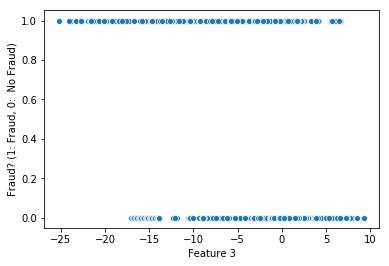

In [2]:
sns.scatterplot(x=df_data_1['Feature 3'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

In [16]:
df_data_1.loc[df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'] == 0]['Feature 3'].min()
# round down to -17.1

-17.09844421

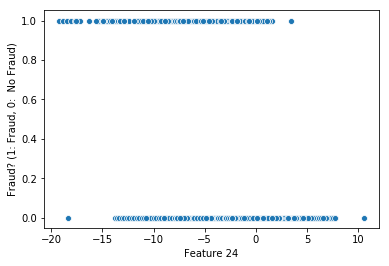

In [3]:
sns.scatterplot(x=df_data_1['Feature 24'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

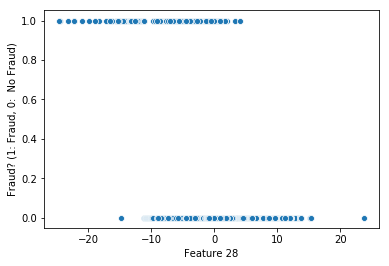

In [6]:
sns.scatterplot(x=df_data_1['Feature 28'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

In [20]:
df_data_1.loc[df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'] == 0]['Feature 28'].min()

-14.74109638

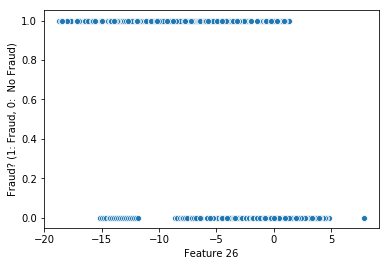

In [5]:
sns.scatterplot(x=df_data_1['Feature 26'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

In [31]:
df_data_1.loc[df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'] == 0]['Feature 26'].min()

-15.14498822

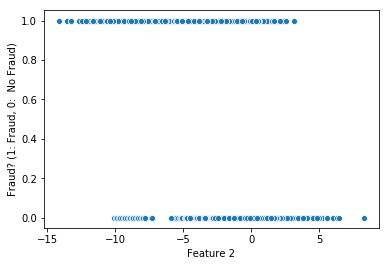

In [7]:
sns.scatterplot(x=df_data_1['Feature 2'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

In [33]:
df_data_1.loc[df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'] == 0]['Feature 2'].min()

-10.11555995

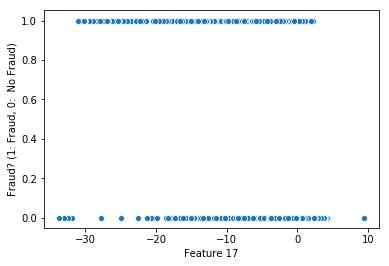

In [8]:
sns.scatterplot(x=df_data_1['Feature 17'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

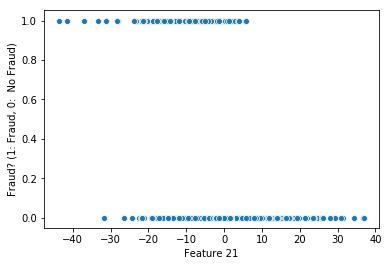

In [9]:
sns.scatterplot(x=df_data_1['Feature 21'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

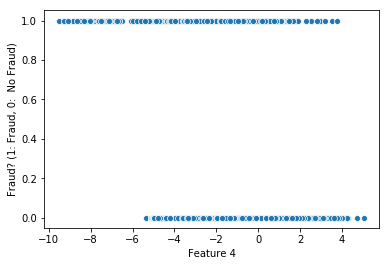

In [10]:
sns.scatterplot(x=df_data_1['Feature 4'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

In [35]:
df_data_1.loc[df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'] == 0]['Feature 4'].min()

-5.366659956

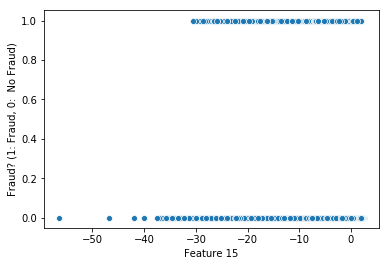

In [11]:
sns.scatterplot(x=df_data_1['Feature 15'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

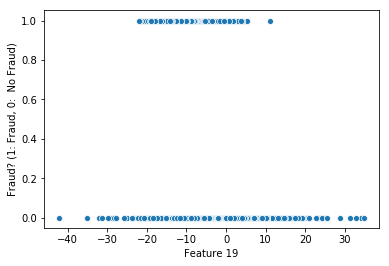

In [12]:
sns.scatterplot(x=df_data_1['Feature 19'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

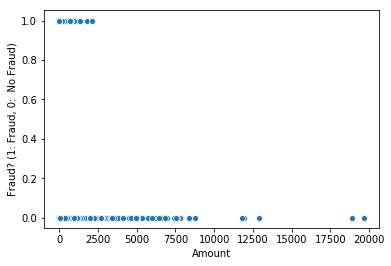

In [13]:
sns.scatterplot(x=df_data_1['Amount'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

In [ ]:
#the corr function is actually really small. lets use a wrapper method to define what are the best features
#using logisticregression as an example case first

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = df_data_1[['Feature 3','Feature 24','Feature 26','Feature 28','Feature 2','Feature 17','Feature 21','Feature 4','Feature 15','Feature 19']]
Y = df_data_1[['Fraud? (1: Fraud, 0:  No Fraud)']]
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


In [ ]:
X = df_data_1[['Feature 24','Feature 26','Feature 28','Feature 2','Feature 19']]
Y= df_data_1[['Fraud? (1: Fraud, 0:  No Fraud)']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.assign(fraud = y_test['Fraud? (1: Fraud, 0:  No Fraud)'].values)

In [ ]:
print("Total Fraudulent Transactions:")
y_pred_fraud = y_pred.loc[y_pred['fraud']==1] # get fraud transactions
print(y_pred_fraud[1].count())
print("Predicted Fraudulent Transactions with prob over 0.9:")
print(y_pred_fraud[1].loc[y_pred_fraud[1]>0.9].count())
print("Predicted Fraudulent Transactions with prob over 0.5:")
print(y_pred_fraud[1].loc[y_pred_fraud[1]>0.5].count() - y_pred_fraud[1].loc[y_pred_fraud[1]>0.9].count())
print("unpredicatble for fraud: ")
print(y_pred_fraud[1].loc[y_pred_fraud[1]<=0.5].count())
print("nonFraudulent Transactions")
y_pred_nonfraud = y_pred.loc[y_pred['fraud']==0] # get nonfraudulent transactions
print(y_pred_nonfraud[0].count())
print("Predicted NonFraudulent Transactions with prob over 0.9:")
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.9].count())
print("Predicted NonFraudulent Transactions with prob over 0.5:")
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.5].count()-y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.9].count())
print("unpredicatble for non fraud: " )
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]<=0.5].count())

In [ ]:
print(y_pred.shape,y_test.shape)

In [ ]:
fig = plt.figure()
c = [i for i in range(1,45570,1)]
plt.scatter(c,y_pred[1], color="red", linewidth=2.5)
plt.scatter(c,y_test, color="blue", linewidth=2.5)
fig.suptitle('Error Terms', fontsize=20)              # Plot heading \n",
plt.xlabel('Index', fontsize=18)                      # X-label\n",
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label"

In [ ]:
 + bis_tmp# shouldnt use corr function like pearsons correlation cause its continuous vs binary

In [5]:
bis_tmp = ()
for columns in df_data_1:
    bis = stats.pointbiserialr(df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'],df_data_1[columns])
    bis_tmp = np.append(bis_tmp,bis)
print(bis_tmp)

[-1.27186112e-002  1.26967561e-009  5.95387323e-003  4.48353802e-003
  1.00000000e+000  0.00000000e+000 -6.75487529e-003  1.26270351e-003
 -2.20171062e-001  0.00000000e+000 -3.64373811e-001  0.00000000e+000
 -1.30390465e-001  0.00000000e+000  4.01359268e-002  7.15845937e-082
  1.98847933e-002  2.25566763e-021  4.33581693e-002  3.07212788e-095
  2.17517387e-003  2.99143703e-001 -3.40362879e-003  1.04237120e-001
 -5.97380931e-003  4.35150414e-003  1.12272504e-003  5.92022372e-001
  3.07493755e-003  1.42170626e-001  2.15840550e-002  6.76878185e-025
  7.10950409e-003  6.89792644e-004 -1.17083647e-001  0.00000000e+000
  1.02592815e-001  0.00000000e+000 -2.19400218e-001  0.00000000e+000
  1.39911132e-001  0.00000000e+000 -1.15750323e-001  0.00000000e+000
 -4.49947063e-002  2.01216305e-102 -2.17467847e-001  0.00000000e+000
  2.33560209e-002  7.16137353e-029  2.90192265e-003  1.66000409e-001
 -3.12901454e-001  0.00000000e+000 -2.74406087e-003  1.90257392e-001
 -2.69285329e-001  0.00000000e+000

In [6]:
bis_tmp = list(bis_tmp)
count = 0
for i in bis_tmp:
    if count % 2 is 1:
        print(i)
        bis_tmp.remove(i)
        print(count)
        count = count - 1
    count = count + 1

1.2696756142744025e-09
1
0.004483538020076627
1
0.0
1
0.0012627035069330266
1
0.0
1
0.0
1
0.0
1
7.158459368928011e-82
1
2.255667629872798e-21
1
3.072127875735202e-95
1
0.2991437031448084
1
0.10423711958297881
1
0.004351504141032912
1
0.5920223722940232
1
0.14217062569980565
1
6.768781849735663e-25
1
0.0006897926438683649
1
0.0
1
0.0
1
0.0
1
0.0
1
0.0
1
2.012163051312112e-102
1
0.0
1
7.161373527537182e-29
1
0.1660004090939864
1
0.0
1
0.19025739173315923
1
0.0
1
0.0
1
0.0
1
0.0
1


In [7]:
bis_df = pd.DataFrame(bis_tmp)

In [20]:
bis_df.rank().sort_values(0,ascending = False)

# ranking is in decreasing order
# 2 is fraud 
# 29 refers to feature 27
# 20 refers to feature 18
# 18 refers to feature 16
# 9 refers to feature 7
# 7 refers to feature 5
# 24 refers to feature 22
# ...       feature 13
#                feature 6
#                feature 14
#                Amount
# derive top 5 and plot

,0
2,32.0
29,31.0
20,30.0
18,29.0
9,28.0
7,27.0
24,26.0
15,25.0
8,24.0
16,23.0


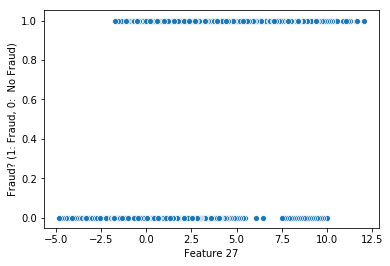

In [39]:
sns.scatterplot(x=df_data_1['Feature 27'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

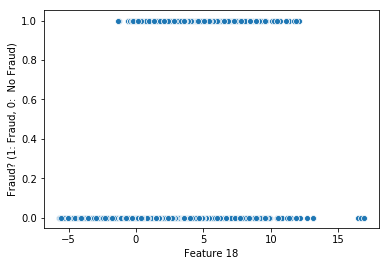

In [40]:
sns.scatterplot(x=df_data_1['Feature 18'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

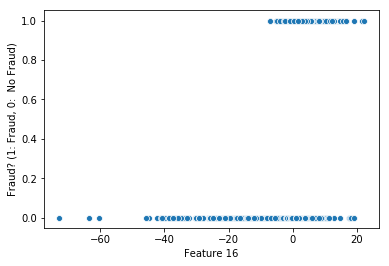

In [41]:
sns.scatterplot(x=df_data_1['Feature 16'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

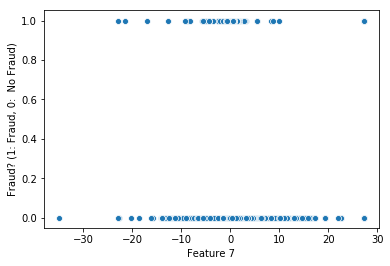

In [42]:
sns.scatterplot(x=df_data_1['Feature 7'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

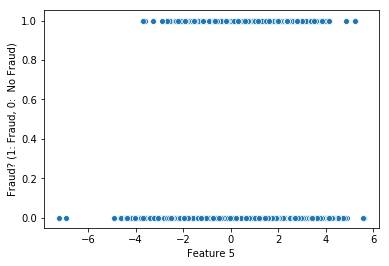

In [43]:
sns.scatterplot(x=df_data_1['Feature 5'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

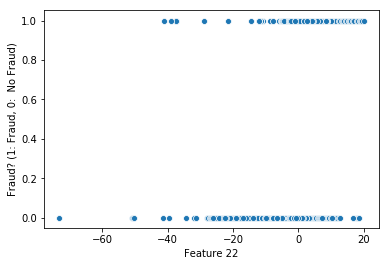

In [44]:
sns.scatterplot(x=df_data_1['Feature 22'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

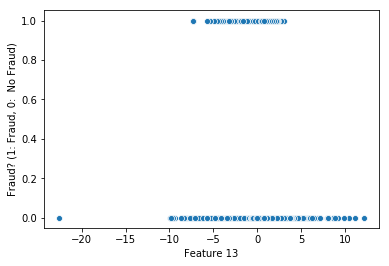

In [45]:
sns.scatterplot(x=df_data_1['Feature 13'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

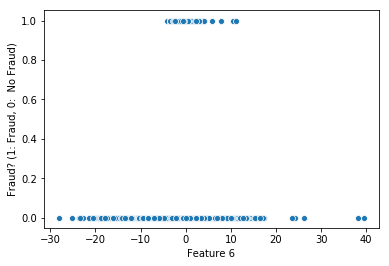

In [46]:
sns.scatterplot(x=df_data_1['Feature 6'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

In [52]:
df_data_1.loc[df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'] == 1]['Feature 6'].max()

11.05900429

In [51]:
df_data_1.loc[df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'] == 1]['Feature 6'].min()

-4.1281858289999995

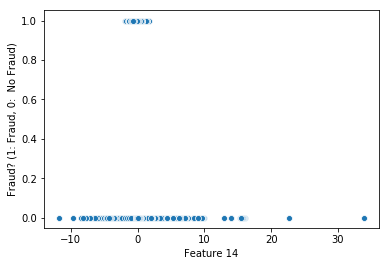

In [47]:
sns.scatterplot(x=df_data_1['Feature 14'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

In [55]:
df_data_1.loc[df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'] == 1]['Feature 14'].min()

-1.869290476

In [56]:
df_data_1.loc[df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'] == 1]['Feature 14'].max()

1.779363852

In [ ]:
# ranking is in decreasing order
# 2 is fraud 
# 29 refers to feature 27
# 20 refers to feature 18
# 18 refers to feature 16
# 9 refers to feature 7
# 7 refers to feature 5
# 24 refers to feature 22
# ...       feature 13
#                feature 6
#                feature 14
#                Amount
# derive top 5 and plot

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X = df_data_1[['Feature 27','Feature 18','Feature 16','Feature 7','Feature 5','Feature 22','Feature 13','Feature 6','Feature 14','Amount']]
Y= df_data_1[['Fraud? (1: Fraud, 0:  No Fraud)']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,)
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs'

Num Features: 5
Selected Features: [ True  True  True False  True  True False False False False]
Feature Ranking: [1 1 1 2 1 1 5 3 4 6]


In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X = df_data_1[['Feature 27','Feature 18','Feature 16','Feature 5','Feature 22']]
Y= df_data_1[['Fraud? (1: Fraud, 0:  No Fraud)']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.assign(fraud = y_test['Fraud? (1: Fraud, 0:  No Fraud)'].values)

(182275, 5) (182275, 1)
(45569, 5) (45569, 1)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
print("Total Fraudulent Transactions:")
y_pred_fraud = y_pred.loc[y_pred['fraud']==1] # get fraud transactions
print(y_pred_fraud[1].count())
print("Predicted Fraudulent Transactions with prob over 0.9:")
print(y_pred_fraud[1].loc[y_pred_fraud[1]>0.9].count())
print("Predicted Fraudulent Transactions with prob over 0.5:")
print(y_pred_fraud[1].loc[y_pred_fraud[1]>0.5].count() - y_pred_fraud[1].loc[y_pred_fraud[1]>0.9].count())
print("unpredicatble for fraud: ")
print(y_pred_fraud[1].loc[y_pred_fraud[1]<=0.5].count())
print("nonFraudulent Transactions")
y_pred_nonfraud = y_pred.loc[y_pred['fraud']==0] # get nonfraudulent transactions
print(y_pred_nonfraud[0].count())
print("Predicted NonFraudulent Transactions with prob over 0.9:")
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.9].count())
print("Predicted NonFraudulent Transactions with prob over 0.5:")
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.5].count()-y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.9].count())
print("unpredicatble for non fraud: " )
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]<=0.5].count())

Total Fraudulent Transactions:
93
Predicted Fraudulent Transactions with prob over 0.9:
35
Predicted Fraudulent Transactions with prob over 0.5:
15
unpredicatble for fraud: 
43
nonFraudulent Transactions
45476
Predicted NonFraudulent Transactions with prob over 0.9:
45458
Predicted NonFraudulent Transactions with prob over 0.5:
15
unpredicatble for non fraud: 
3


In [25]:
# ranking is in decreasing order
# 2 is fraud 
# 29 refers to feature 27
# 20 refers to feature 18
# 18 refers to feature 16
# 9 refers to feature 7
# 7 refers to feature 5
# 24 refers to feature 22
# ...       feature 13
#                feature 6
#                feature 14
#                Amount
# derive top 5 and plot

X = df_data_1[['Feature 27','Feature 18','Feature 16','Feature 7','Feature 5','Feature 22','Feature 13','Feature 6','Feature 14','Amount']]
Y = df_data_1[['Fraud? (1: Fraud, 0:  No Fraud)']]
model = XGBClassifier()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features: 5
Selected Features: [ True  True  True  True False False False False False  True]
Feature Ranking: [1 1 1 1 3 5 4 2 6 1]


In [71]:
X = df_data_1[['Feature 27','Feature 18','Feature 16','Feature 7','Amount']]
Y= df_data_1[['Fraud? (1: Fraud, 0:  No Fraud)']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.assign(fraud = y_test['Fraud? (1: Fraud, 0:  No Fraud)'].values)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
print("Total Fraudulent Transactions:")
y_pred_fraud = y_pred.loc[y_pred['fraud']==1] # get fraud transactions
print(y_pred_fraud[1].count())
print("Predicted Fraudulent Transactions with prob over 0.9:")
print(y_pred_fraud[1].loc[y_pred_fraud[1]>0.9].count())
print("Predicted Fraudulent Transactions with prob over 0.5:")
print(y_pred_fraud[1].loc[y_pred_fraud[1]>0.5].count() - y_pred_fraud[1].loc[y_pred_fraud[1]>0.9].count())
print("unpredicatble for fraud: ")
print(y_pred_fraud[1].loc[y_pred_fraud[1]<=0.5].count())
print("nonFraudulent Transactions")
y_pred_nonfraud = y_pred.loc[y_pred['fraud']==0] # get nonfraudulent transactions
print(y_pred_nonfraud[0].count())
print("Predicted NonFraudulent Transactions with prob over 0.9:")
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.9].count())
print("Predicted NonFraudulent Transactions with prob over 0.5:")
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.5].count()-y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.9].count())
print("unpredicatble for non fraud: " )
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]<=0.5].count())

Total Fraudulent Transactions:
71
Predicted Fraudulent Transactions with prob over 0.9:
32
Predicted Fraudulent Transactions with prob over 0.5:
16
unpredicatble for fraud: 
23
nonFraudulent Transactions
45498
Predicted NonFraudulent Transactions with prob over 0.9:
45478
Predicted NonFraudulent Transactions with prob over 0.5:
16
unpredicatble for non fraud: 
4


In [ ]:
X = df_data_1[['Feature 3','Feature 26','Feature 21','Feature 2','Feature 17']]
Y= df_data_1[['Fraud? (1: Fraud, 0:  No Fraud)']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.assign(fraud = y_test['Fraud? (1: Fraud, 0:  No Fraud)'].values)

In [ ]:
print("Total Fraudulent Transactions:")
y_pred_fraud = y_pred.loc[y_pred['fraud']==1] # get fraud transactions
print(y_pred_fraud[1].count())
print("Predicted Fraudulent Transactions with prob over 0.9:")
print(y_pred_fraud[1].loc[y_pred_fraud[1]>0.9].count())
print("Predicted Fraudulent Transactions with prob over 0.5:")
print(y_pred_fraud[1].loc[y_pred_fraud[1]>0.5].count() - y_pred_fraud[1].loc[y_pred_fraud[1]>0.9].count())
print("unpredicatble for fraud: ")
print(y_pred_fraud[1].loc[y_pred_fraud[1]<=0.5].count())
print("nonFraudulent Transactions")
y_pred_nonfraud = y_pred.loc[y_pred['fraud']==0] # get nonfraudulent transactions
print(y_pred_nonfraud[0].count())
print("Predicted NonFraudulent Transactions with prob over 0.9:")
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.9].count())
print("Predicted NonFraudulent Transactions with prob over 0.5:")
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.5].count()-y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.9].count())
print("unpredicatble for non fraud: " )
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]<=0.5].count())

In [27]:
tmp_feature_3 = ()
for i in df_data_1['Feature 3']:
    if i > -17.1:
        tmp_feature_3 = np.append(tmp_feature_3, 0)
    else:
        tmp_feature_3 = np.append(tmp_feature_3,1)
print(len(tmp_feature_3))
df_data_1['Feature 3 engineered'] = tmp_feature_3
print(df_data_1['Feature 3 engineered'].head())
del tmp_feature_3

227844
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Feature 3 engineered, dtype: float64


In [28]:
tmp_feature_28 = ()
for i in df_data_1['Feature 28']:
    if i > -14.75:
        tmp_feature_28 = np.append(tmp_feature_28, 0)
    else:
        tmp_feature_28 = np.append(tmp_feature_28,1)
print(len(tmp_feature_28))
df_data_1['Feature 28 engineered'] = tmp_feature_28
print(df_data_1['Feature 28 engineered'].head())

227844
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Feature 28 engineered, dtype: float64


In [29]:
tmp_feature_26 = ()
for i in df_data_1['Feature 26']:
    if i > -15.15:
        tmp_feature_26 = np.append(tmp_feature_26, 0)
    else:
        tmp_feature_26 = np.append(tmp_feature_26,1)
print(len(tmp_feature_26))
df_data_1['Feature 26 engineered'] = tmp_feature_26
print(df_data_1['Feature 26 engineered'].head())

227844
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Feature 26 engineered, dtype: float64


In [30]:
tmp_feature_2 = ()
for i in df_data_1['Feature 2']:
    if i > -10.12:
        tmp_feature_2 = np.append(tmp_feature_2, 0)
    else:
        tmp_feature_2 = np.append(tmp_feature_2,1)
print(len(tmp_feature_2))
df_data_1['Feature 2 engineered'] = tmp_feature_2
print(df_data_1['Feature 2 engineered'].head())

227844
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Feature 2 engineered, dtype: float64


In [31]:
tmp_feature_4 = ()
for i in df_data_1['Feature 4']:
    if i > -5.37:
        tmp_feature_4 = np.append(tmp_feature_4, 0)
    else:
        tmp_feature_4 = np.append(tmp_feature_4,1)
print(len(tmp_feature_4))
df_data_1['Feature 4 engineered'] = tmp_feature_4
print(df_data_1['Feature 4 engineered'].head())

227844
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Feature 4 engineered, dtype: float64


In [32]:
tmp_feature_6 = ()
for i in df_data_1['Feature 6']:
    if i > -4.13 and i < 11.06:
        tmp_feature_6 = np.append(tmp_feature_6, 1)
    else:
        tmp_feature_6 = np.append(tmp_feature_6,0)
print(len(tmp_feature_6))
df_data_1['Feature 6 engineered'] = tmp_feature_6
print(df_data_1['Feature 6 engineered'].head())

227844
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Feature 6 engineered, dtype: float64


In [33]:
tmp_feature_14 = ()
for i in df_data_1['Feature 14']:
    if i > -1.87 and i < 1.78:
        tmp_feature_14 = np.append(tmp_feature_14, 1)
    else:
        tmp_feature_14 = np.append(tmp_feature_14,0)
print(len(tmp_feature_14))
df_data_1['Feature 14 engineered'] = tmp_feature_14
print(df_data_1['Feature 14 engineered'].head())

227844
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Feature 14 engineered, dtype: float64


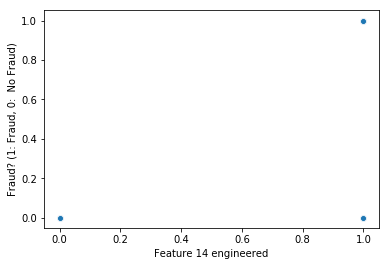

In [82]:
sns.scatterplot(x=df_data_1['Feature 14 engineered'],y=df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'])

Total engineered features are:
1) Feature 3
2) Featuer 28
3) 26
4) 2
5) 4
6) 6
7) 14

In [98]:
bis_tmp = ()
for columns in df_data_1:
    bis = stats.pointbiserialr(df_data_1['Fraud? (1: Fraud, 0:  No Fraud)'],df_data_1[columns])
    bis_tmp = np.append(bis_tmp,bis)
print(bis_tmp)
bis_tmp = list(bis_tmp)
count = 0
for i in bis_tmp:
    if count % 2 is 1:
        print(i)
        bis_tmp.remove(i)
        print(count)
        count = count - 1
    count = count + 1
bis_df = pd.DataFrame(bis_tmp)
bis_df.rank().sort_values(0,ascending = False)

[-1.27186112e-002  1.26967561e-009  5.95387323e-003  4.48353802e-003
  1.00000000e+000  0.00000000e+000 -6.75487529e-003  1.26270351e-003
 -2.20171062e-001  0.00000000e+000 -3.64373811e-001  0.00000000e+000
 -1.30390465e-001  0.00000000e+000  4.01359268e-002  7.15845937e-082
  1.98847933e-002  2.25566763e-021  4.33581693e-002  3.07212788e-095
  2.17517387e-003  2.99143703e-001 -3.40362879e-003  1.04237120e-001
 -5.97380931e-003  4.35150414e-003  1.12272504e-003  5.92022372e-001
  3.07493755e-003  1.42170626e-001  2.15840550e-002  6.76878185e-025
  7.10950409e-003  6.89792644e-004 -1.17083647e-001  0.00000000e+000
  1.02592815e-001  0.00000000e+000 -2.19400218e-001  0.00000000e+000
  1.39911132e-001  0.00000000e+000 -1.15750323e-001  0.00000000e+000
 -4.49947063e-002  2.01216305e-102 -2.17467847e-001  0.00000000e+000
  2.33560209e-002  7.16137353e-029  2.90192265e-003  1.66000409e-001
 -3.12901454e-001  0.00000000e+000 -2.74406087e-003  1.90257392e-001
 -2.69285329e-001  0.00000000e+000

,0
2,39.0
36,38.0
34,37.0
32,36.0
35,35.0
33,34.0
29,33.0
20,32.0
18,31.0
9,30.0


In [101]:
#ranked by fraud, feature 4 engineered,feature 2 engineered,feature 3 engineered,feature 26 engineered,feature 28 engineered
print(df_data_1.columns)


Index(['Seconds since reference time', 'Amount',
       'Fraud? (1: Fraud, 0:  No Fraud)', 'Feature 1', 'Feature 2',
       'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7',
       'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12',
       'Feature 13', 'Feature 14', 'Feature 15', 'Feature 16', 'Feature 17',
       'Feature 18', 'Feature 19', 'Feature 20', 'Feature 21', 'Feature 22',
       'Feature 23', 'Feature 24', 'Feature 25', 'Feature 26', 'Feature 27',
       'Feature 28', 'Feature 29', 'Feature 3 engineered',
       'Feature 28 engineered', 'Feature 2 engineered',
       'Feature 26 engineered', 'Feature 4 engineered', 'Feature 6 engineered',
       'Feature 14 engineered'],
      dtype='object')


In [34]:
#X = df_data_1[['Feature 27','Feature 18','Feature 16','Feature 7','Amount','Feature 3 engineered','Feature 3']]
X = df_data_1[['Feature 27','Feature 18','Feature 16','Feature 7','Amount','Feature 3 engineered','Feature 28 engineered','Feature 2 engineered','Feature 26 engineered','Feature 4 engineered','Feature 6 engineered']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.assign(fraud = y_test['Fraud? (1: Fraud, 0:  No Fraud)'].values)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
print("Total Fraudulent Transactions:")
y_pred_fraud = y_pred.loc[y_pred['fraud']==1] # get fraud transactions
print(y_pred_fraud[1].count())
print("Predicted Fraudulent Transactions with prob over 0.9:")
print(y_pred_fraud[1].loc[y_pred_fraud[1]>0.9].count())
print("Predicted Fraudulent Transactions with prob over 0.5:")
print(y_pred_fraud[1].loc[y_pred_fraud[1]>0.5].count() - y_pred_fraud[1].loc[y_pred_fraud[1]>0.9].count())
print("unpredicatble for fraud: ")
print(y_pred_fraud[1].loc[y_pred_fraud[1]<=0.5].count())
print("nonFraudulent Transactions")
y_pred_nonfraud = y_pred.loc[y_pred['fraud']==0] # get nonfraudulent transactions
print(y_pred_nonfraud[0].count())
print("Predicted NonFraudulent Transactions with prob over 0.9:")
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.9].count())
print("Predicted NonFraudulent Transactions with prob over 0.5:")
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.5].count()-y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.9].count())
print("unpredicatble for non fraud: " )
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]<=0.5].count())

Total Fraudulent Transactions:
79
Predicted Fraudulent Transactions with prob over 0.9:
31
Predicted Fraudulent Transactions with prob over 0.5:
16
unpredicatble for fraud: 
32
nonFraudulent Transactions
45490
Predicted NonFraudulent Transactions with prob over 0.9:
45462
Predicted NonFraudulent Transactions with prob over 0.5:
23
unpredicatble for non fraud: 
5


In [168]:
df_data_1['Feature 3 engineered']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
227814    0.0
227815    0.0
227816    0.0
227817    0.0
227818    0.0
227819    0.0
227820    0.0
227821    0.0
227822    0.0
227823    0.0
227824    0.0
227825    0.0
227826    0.0
227827    0.0
227828    0.0
227829    0.0
227830    0.0
227831    0.0
227832    0.0
227833    0.0
227834    0.0
227835    0.0
227836    0.0
227837    0.0
227838    0.0
227839    0.0
227840    0.0
227841    0.0
227842    0.0
227843    0.0
Name: Feature 3 engineered, Length: 227844, dtype: float64

In [164]:
#Total engineered features are:
#1) Feature 3
#2) Featuer 28
#3) 26
#4) 2
#5) 4
#6) 6
#7) 14
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X = df_data_1[['Feature 3','Feature 21','Feature 26','Feature 2','Feature 17','Feature 3 engineered']]
Y = df_data_1[['Fraud? (1: Fraud, 0:  No Fraud)']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
classifier = QuadraticDiscriminantAnalysis() #0.8674698795180723
classifier.fit(X_train, y_train)
# Predict Results from PCA Model
y_pred = classifier.predict(X_test)
y_pred = classifier.predict_proba(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.assign(fraud = y_test['Fraud? (1: Fraud, 0:  No Fraud)'].values)

print("Total Fraudulent Transactions:")
y_pred_fraud = y_pred.loc[y_pred['fraud']==1] # get fraud transactions
print(y_pred_fraud[1].count())
print("Predicted Fraudulent Transactions with prob over 0.9:")
print(y_pred_fraud[1].loc[y_pred_fraud[1]>0.9].count())
print("Predicted Fraudulent Transactions with prob over 0.5:")
print(y_pred_fraud[1].loc[y_pred_fraud[1]>0.5].count() - y_pred_fraud[1].loc[y_pred_fraud[1]>0.9].count())
print("unpredicatble for fraud: ")
print(y_pred_fraud[1].loc[y_pred_fraud[1]<=0.5].count())
print("nonFraudulent Transactions")
y_pred_nonfraud = y_pred.loc[y_pred['fraud']==0] # get nonfraudulent transactions
print(y_pred_nonfraud[0].count())
print("Predicted NonFraudulent Transactions with prob over 0.9:")
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.9].count())
print("Predicted NonFraudulent Transactions with prob over 0.5:")
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.5].count()-y_pred_nonfraud[0].loc[y_pred_nonfraud[0]>0.9].count())
print("unpredicatble for non fraud: " )
print(y_pred_nonfraud[0].loc[y_pred_nonfraud[0]<=0.5].count())



Total Fraudulent Transactions:
0
Predicted Fraudulent Transactions with prob over 0.9:
0
Predicted Fraudulent Transactions with prob over 0.5:
0
unpredicatble for fraud: 
0
nonFraudulent Transactions
0
Predicted NonFraudulent Transactions with prob over 0.9:
0
Predicted NonFraudulent Transactions with prob over 0.5:
0
unpredicatble for non fraud: 
0


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:710: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:710: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:713: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant